---
---
# Level of Underlying 
---
---

### Import *.py* Files

In [30]:
# only shows data first time - restart kernel 
import CONFIG as c
import BLACK_SCHOLES as bs

### Import Libraries
- [datascience](https://github.com/data-8/datascience)
- [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)

In [31]:
import matplotlib 
import warnings 

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import ipywidgets as widgets

from pandas_datareader import data as web
from datetime import datetime,date
from scipy.stats import norm
from math import log, sqrt, pi, exp

from datascience import *
from ipywidgets import interact, interactive, fixed, interact_manual

plt.style.use('fivethirtyeight')
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline

---
---
## Level of Underlying 
---
---

In [32]:
last_price = bs.lastCloseP
start_table = last_price - ((last_price/4)*2)
end_table = last_price + (last_price/4)
step_size = (last_price/2)//10
end_table

536.3249969482422

In [33]:
new_table = Table().with_column("Level of Underlying", np.arange(start_table,end_table,step_size))
#new_table.show()

In [34]:
expiration_oneYR_arr = make_array()
matureOne = 1 
for price in np.arange(start_table,end_table,step_size):
    if price == 0:
        expiration_oneYR_arr = np.append(expiration_oneYR_arr,0)
    else:
        expiration_oneYR_arr = np.append(expiration_oneYR_arr, bs.black_scholes(price, c.strike_price, matureOne, bs.riskFree, bs.sigma, option='call'))

expiration_oneYR_arr

array([1.23379654e-02, 8.58666476e-02, 3.99832512e-01, 1.36179643e+00,
       3.62829137e+00, 7.96358877e+00, 1.49938373e+01, 2.50055784e+01,
       3.78948206e+01, 5.32600357e+01, 7.05587942e+01, 8.92481741e+01,
       1.08869942e+02, 1.29080463e+02, 1.49644108e+02, 1.70410391e+02])

In [35]:
new_table = new_table.with_column("Time to Expiration of One Year", expiration_oneYR_arr)
new_table.show()

Level of Underlying,Time to Expiration of One Year
214.53,0.012338
235.53,0.0858666
256.53,0.399833
277.53,1.3618
298.53,3.62829
319.53,7.96359
340.53,14.9938
361.53,25.0056
382.53,37.8948
403.53,53.26


In [36]:
no_expiration = make_array()
noExpire = 0.0000001
for price in np.arange(start_table,end_table,step_size):
    if price == 0: 
        no_expiration = np.append(no_expiration, 0)
    else: 
        no_expiration = np.append(no_expiration, bs.black_scholes(price, c.strike_price, noExpire, bs.riskFree, bs.sigma, option='call'))
        
no_expiration

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        12.52999986,  33.52999986,  54.52999986,  75.52999986,
        96.52999986, 117.52999986, 138.52999986, 159.52999986])

In [37]:
new_table = new_table.with_column("Time to Expiration of None", no_expiration)
new_table.show()

Level of Underlying,Time to Expiration of One Year,Time to Expiration of None
214.53,0.012338,0
235.53,0.0858666,0
256.53,0.399833,0
277.53,1.3618,0
298.53,3.62829,0
319.53,7.96359,0
340.53,14.9938,0
361.53,25.0056,0
382.53,37.8948,12.53
403.53,53.26,33.53


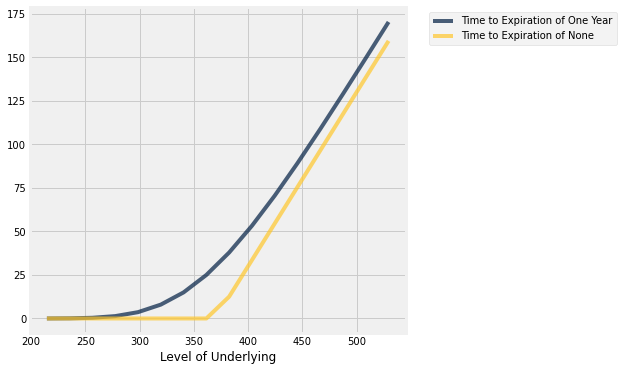

In [38]:
new_table.plot("Level of Underlying")

In [39]:
exp_threeYr_arr = make_array()
for price in np.arange(start_table,end_table,step_size):
    threeYr = 3
    if price == 0: 
        exp_threeYr_arr = np.append(exp_threeYr_arr, 0)
    else: 
        exp_threeYr_arr = np.append(exp_threeYr_arr, bs.black_scholes(price, c.strike_price, threeYr, bs.riskFree, bs.sigma, option='call'))
exp_threeYr_arr

array([  1.84842373,   3.98044033,   7.49183198,  12.68927902,
        19.76632477,  28.78983828,  39.71241927,  52.39985205,
        66.66310212,  82.28757211,  99.05594593, 116.76372618,
       135.22822068, 154.29244712, 173.82552877, 193.72094196])

In [40]:
new_table = new_table.with_column("Time to Expiration of Three Years", exp_threeYr_arr)
new_table.show()

Level of Underlying,Time to Expiration of One Year,Time to Expiration of None,Time to Expiration of Three Years
214.53,0.012338,0,1.84842
235.53,0.0858666,0,3.98044
256.53,0.399833,0,7.49183
277.53,1.3618,0,12.6893
298.53,3.62829,0,19.7663
319.53,7.96359,0,28.7898
340.53,14.9938,0,39.7124
361.53,25.0056,0,52.3999
382.53,37.8948,12.53,66.6631
403.53,53.26,33.53,82.2876


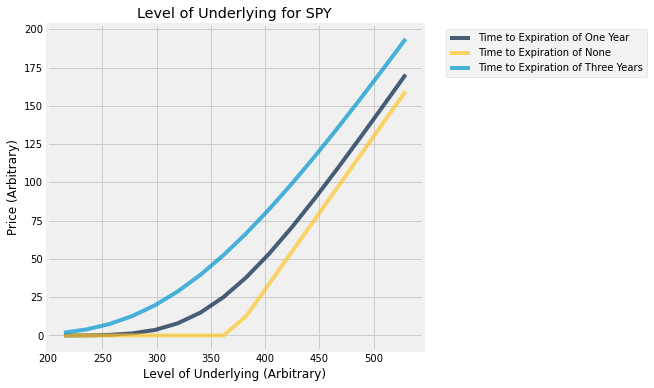

In [41]:
new_table.plot("Level of Underlying")
plt.title('Level of Underlying for {}'.format(c.stock))
plt.xlabel('Level of Underlying (Arbitrary)')
plt.ylabel('Price (Arbitrary)')

plt.show()

---
## Using *.py* File
---

In [42]:
import LEVUNDERLYING as lu

/Users/CODEUSR/Documents/PROJECTS/finance/OptionsAnalysis/blackScholes/BLACK_SCHOLES.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (log(s/k) + (r+sigma**2/2) * t) / (sigma*sqrt(t))


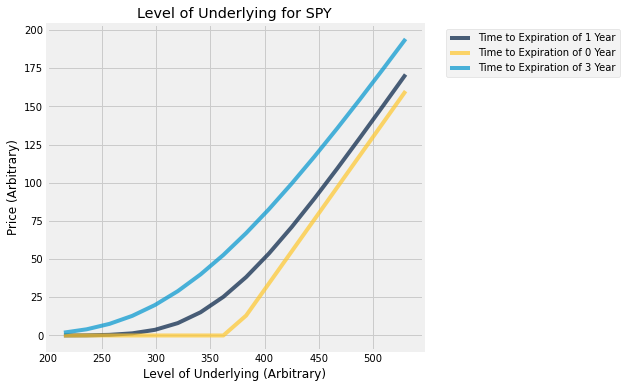

In [43]:
levels = [1,0,3]
Under = lu.Underlying(c.stock, bs.lastCloseP, c.strike_price, bs.riskFree, bs.sigma)
k = Under.makeFullTable(levels)
Under.plotting(k)